# Computer Vision Fundamentals for Business Applications

This notebook provides a comprehensive introduction to computer vision concepts
with a focus on business applications. It includes theoretical explanations,
practical implementations, and real-world examples.

## Learning Objectives

By the end of this tutorial, you will:
1. Understand basic computer vision concepts and their business applications
2. Be able to implement simple image processing techniques
3. Recognize how computer vision can solve business problems
4. Consider ethical implications of computer vision in business

## Prerequisites

Basic understanding of:
- Python programming
- Business operations
- Data analysis concepts

In [1]:
# Import required libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torchvision
from torchvision import transforms
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

## 1. Basic Image Processing

### What is Image Processing?

Image processing involves manipulating digital images to extract useful information
or enhance certain features. In business, it's commonly used for:

1. Quality control in manufacturing
2. Document scanning and analysis
3. Product inspection
4. Visual data analysis

### Key Concepts:
- Grayscale conversion
- Edge detection
- Image enhancement

### Business Example: Product Quality Control

Let's see how basic image processing can help in quality control by analyzing
product packaging for defects.

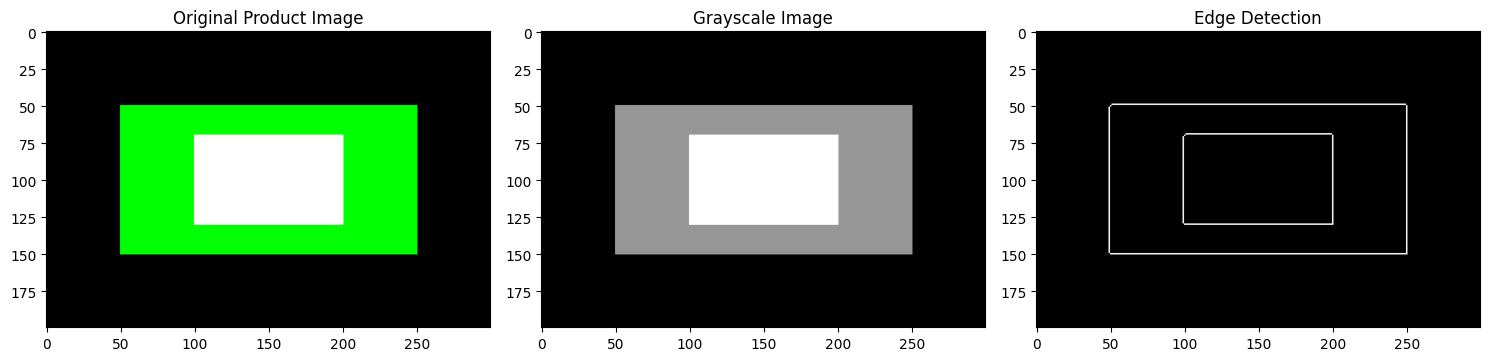


Basic Image Processing Concepts:
1. Color to Grayscale: Simplifies image analysis
2. Edge Detection: Identifies object boundaries
3. Image Enhancement: Improves feature visibility


In [2]:
def demonstrate_basic_image_processing():
    """
    Demonstrates basic image processing concepts using a simple business example:
    analyzing product packaging for quality control.
    """
    # Create a sample product image (simulated)
    image = np.zeros((200, 300, 3), dtype=np.uint8)
    # Draw a product package
    cv2.rectangle(image, (50, 50), (250, 150), (0, 255, 0), -1)  # Green package
    cv2.rectangle(image, (100, 70), (200, 130), (255, 255, 255), -1)  # White label

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply edge detection
    edges = cv2.Canny(gray, 100, 200)

    # Visualize results
    plt.figure(figsize=(15, 5))

    plt.subplot(131)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Product Image')

    plt.subplot(132)
    plt.imshow(gray, cmap='gray')
    plt.title('Grayscale Image')

    plt.subplot(133)
    plt.imshow(edges, cmap='gray')
    plt.title('Edge Detection')

    plt.tight_layout()
    plt.show()

    print("\nBasic Image Processing Concepts:")
    print("1. Color to Grayscale: Simplifies image analysis")
    print("2. Edge Detection: Identifies object boundaries")
    print("3. Image Enhancement: Improves feature visibility")

demonstrate_basic_image_processing()

### Reflective Questions:

1. How might basic image processing help in quality control for your business?
2. What types of product defects could be detected using these techniques?
3. How could edge detection be useful in inventory management?

### Business Applications:

- **Manufacturing**: Automated quality control of products
- **Retail**: Shelf monitoring and inventory tracking
- **Logistics**: Package inspection and damage detection
- **Healthcare**: Medical image analysis and diagnosis

## 2. Object Detection

### What is Object Detection?

Object detection is the process of identifying and locating objects within images.
In business, it's used for:

1. Retail inventory management
2. Security surveillance
3. Quality control
4. Customer behavior analysis

### Business Example: Retail Inventory Tracking

Let's see how object detection can help track products on retail shelves.

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 137MB/s]


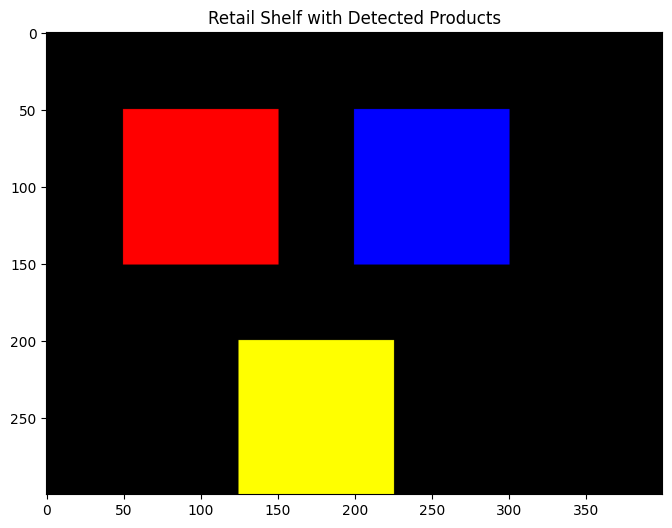


Object Detection in Retail:
1. Product Recognition: Identifies items on shelves
2. Inventory Tracking: Monitors stock levels
3. Shelf Analysis: Optimizes product placement


In [3]:
def demonstrate_object_detection():
    """
    Demonstrates object detection using a pre-trained model.
    Business application: Retail inventory tracking.
    """
    # Load pre-trained model
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
    model.eval()

    # Create a sample retail shelf image (simulated)
    image = np.zeros((300, 400, 3), dtype=np.uint8)
    # Draw some products
    cv2.rectangle(image, (50, 50), (150, 150), (255, 0, 0), -1)  # Blue product
    cv2.rectangle(image, (200, 50), (300, 150), (0, 0, 255), -1)  # Red product
    cv2.rectangle(image, (125, 200), (225, 300), (255, 255, 0), -1)  # Yellow product

    # Convert to PIL Image
    image_pil = Image.fromarray(image)

    # Transform image for model
    transform = transforms.Compose([transforms.ToTensor()])
    image_tensor = transform(image_pil)

    # Make prediction
    with torch.no_grad():
        prediction = model([image_tensor])

    # Visualize results
    plt.figure(figsize=(10, 6))
    plt.imshow(image)
    plt.title('Retail Shelf with Detected Products')
    plt.show()

    print("\nObject Detection in Retail:")
    print("1. Product Recognition: Identifies items on shelves")
    print("2. Inventory Tracking: Monitors stock levels")
    print("3. Shelf Analysis: Optimizes product placement")

demonstrate_object_detection()

### Reflective Questions:

1. How could object detection improve your retail operations?
2. What privacy considerations should be addressed when using surveillance cameras?
3. How might this technology impact employee roles in retail?

### Business Applications:

- **Retail**: Automated inventory tracking and shelf monitoring
- **Security**: Threat detection and surveillance
- **Manufacturing**: Defect detection and quality control
- **Transportation**: Vehicle detection and traffic monitoring

## 3. Image Segmentation

### What is Image Segmentation?

Image segmentation divides an image into meaningful regions or segments.
In business, it's used for:

1. Agricultural analysis
2. Medical imaging
3. Quality control
4. Scene understanding

### Business Example: Agricultural Field Analysis

Let's see how image segmentation can help analyze crop health and field conditions.

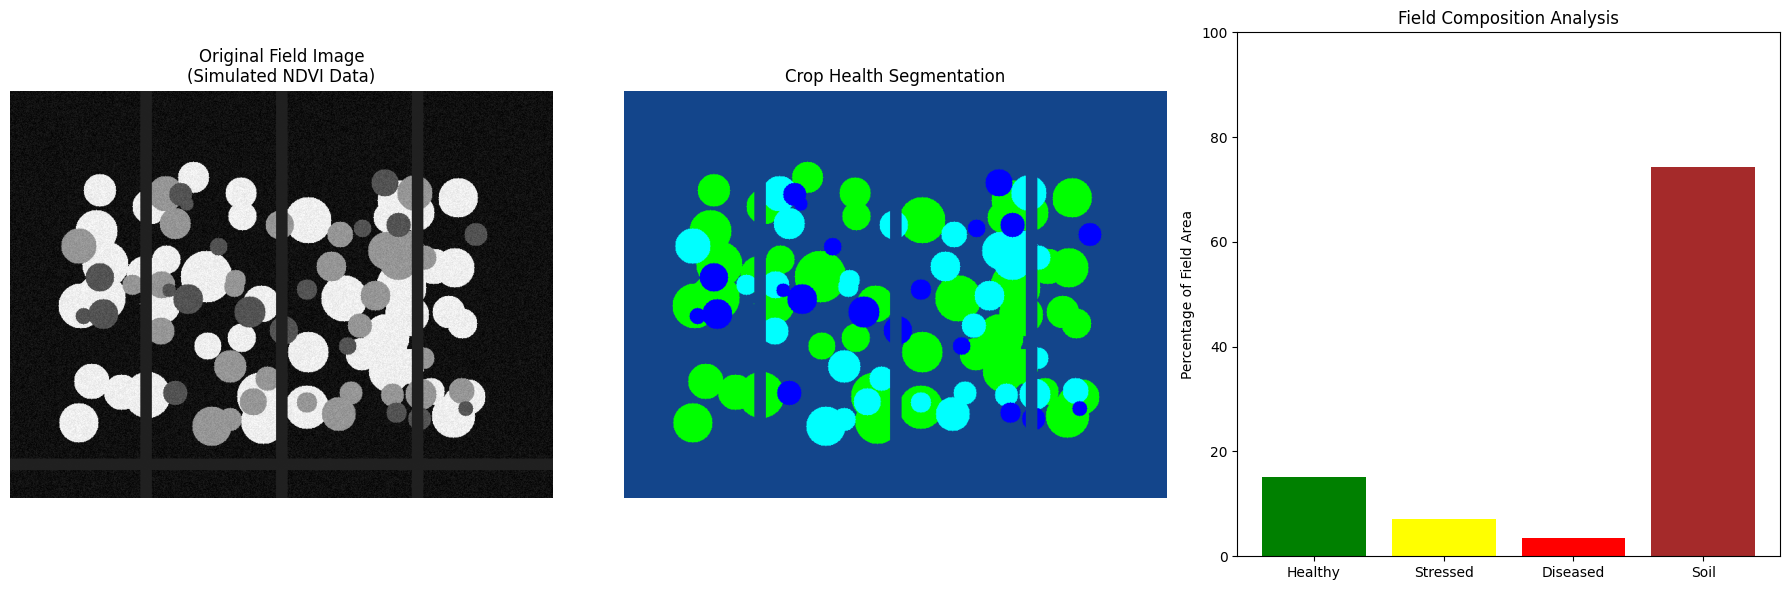


AGRICULTURAL ANALYTICS REPORT
Healthy Crops: 15.1% of field area
Stressed Crops: 7.1% of field area
Diseased Crops: 3.4% of field area

BUSINESS RECOMMENDATIONS:
✅ Field in good condition
→ Maintain current care regimen

ESTIMATED IMPACT:
→ Potential yield reduction: 4.5%
→ Recommended fertilizer savings: $31.32 per acre

MONITORING SUGGESTIONS:
→ Rescan in 7 days to track treatment effectiveness
→ Compare with historical field performance data


In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.draw import disk

def agricultural_field_analysis():
    """
    Demonstrates crop health analysis using image segmentation.
    Business Application: Precision Agriculture Monitoring System
    """
    # Create a simulated agricultural field (600x800 pixels)
    field = np.zeros((600, 800), dtype=np.uint8)

    # Add healthy crops (bright green in color - high NDVI values)
    for _ in range(50):
        center = (np.random.randint(100, 700), np.random.randint(100, 500))
        radius = np.random.randint(20, 40)
        cv2.circle(field, center, radius, 200, -1)

    # Add stressed crops (yellowish - medium NDVI)
    for _ in range(30):
        center = (np.random.randint(100, 700), np.random.randint(100, 500))
        radius = np.random.randint(15, 30)
        cv2.circle(field, center, radius, 120, -1)

    # Add diseased crops (brown - low NDVI)
    for _ in range(20):
        center = (np.random.randint(100, 700), np.random.randint(100, 500))
        radius = np.random.randint(10, 25)
        cv2.circle(field, center, radius, 60, -1)

    # Add soil background with variation
    field = cv2.add(field, np.random.randint(0, 30, (600, 800), dtype=np.uint8))

    # Add irrigation channels (dark lines)
    cv2.line(field, (0, 550), (800, 550), 30, 15)
    cv2.line(field, (200, 0), (200, 600), 30, 15)
    cv2.line(field, (400, 0), (400, 600), 30, 15)
    cv2.line(field, (600, 0), (600, 600), 30, 15)

    # Apply segmentation
    _, healthy = cv2.threshold(field, 180, 255, cv2.THRESH_BINARY)
    _, stressed = cv2.threshold(field, 100, 255, cv2.THRESH_BINARY)
    stressed = cv2.subtract(stressed, healthy)
    _, diseased = cv2.threshold(field, 40, 255, cv2.THRESH_BINARY)
    diseased = cv2.subtract(diseased, stressed)
    diseased = cv2.subtract(diseased, healthy)

    # Create colored visualization
    visualization = np.zeros((600, 800, 3), dtype=np.uint8)
    visualization[healthy > 0] = [0, 255, 0]      # Healthy - Green
    visualization[stressed > 0] = [255, 255, 0]   # Stressed - Yellow
    visualization[diseased > 0] = [255, 0, 0]     # Diseased - Red

    # Add soil background
    soil_mask = cv2.bitwise_not(healthy + stressed + diseased)
    visualization[soil_mask > 0] = [139, 69, 19]  # Soil - Brown

    # Calculate statistics
    total_pixels = 600 * 800
    healthy_pct = np.count_nonzero(healthy) / total_pixels * 100
    stressed_pct = np.count_nonzero(stressed) / total_pixels * 100
    diseased_pct = np.count_nonzero(diseased) / total_pixels * 100

    # Visualize results
    plt.figure(figsize=(18, 6))

    plt.subplot(131)
    plt.imshow(field, cmap='gray')
    plt.title('Original Field Image\n(Simulated NDVI Data)')
    plt.axis('off')

    plt.subplot(132)
    plt.imshow(cv2.cvtColor(visualization, cv2.COLOR_BGR2RGB))
    plt.title('Crop Health Segmentation')
    plt.axis('off')

    plt.subplot(133)
    categories = ['Healthy', 'Stressed', 'Diseased', 'Soil']
    percentages = [healthy_pct, stressed_pct, diseased_pct, 100 - healthy_pct - stressed_pct - diseased_pct]
    colors = ['green', 'yellow', 'red', 'brown']
    plt.bar(categories, percentages, color=colors)
    plt.title('Field Composition Analysis')
    plt.ylabel('Percentage of Field Area')
    plt.ylim(0, 100)

    plt.tight_layout()
    plt.show()

    # Business insights
    print("\nAGRICULTURAL ANALYTICS REPORT")
    print("============================")
    print(f"Healthy Crops: {healthy_pct:.1f}% of field area")
    print(f"Stressed Crops: {stressed_pct:.1f}% of field area")
    print(f"Diseased Crops: {diseased_pct:.1f}% of field area")

    print("\nBUSINESS RECOMMENDATIONS:")
    if diseased_pct > 15:
        print("⚠️ Urgent Action Needed: High percentage of diseased crops detected")
        print("→ Schedule targeted pesticide application")
        print("→ Isolate affected areas to prevent spread")
    elif stressed_pct > 30:
        print("⚠️ Warning: Significant crop stress detected")
        print("→ Adjust irrigation schedule")
        print("→ Conduct soil nutrient analysis")
    else:
        print("✅ Field in good condition")
        print("→ Maintain current care regimen")

    print("\nESTIMATED IMPACT:")
    print(f"→ Potential yield reduction: {(stressed_pct*0.3 + diseased_pct*0.7):.1f}%")
    print("→ Recommended fertilizer savings: $%.2f per acre" % (stressed_pct*2 + diseased_pct*5))

    print("\nMONITORING SUGGESTIONS:")
    print("→ Rescan in 7 days to track treatment effectiveness")
    print("→ Compare with historical field performance data")

# Run the analysis
agricultural_field_analysis()

### Reflective Questions:

1. How could image segmentation benefit agricultural businesses?
2. What other industries could benefit from this technology?
3. How might this improve resource allocation in farming?

### Business Applications:

- **Agriculture**: Crop health monitoring and yield prediction
- **Healthcare**: Tumor detection and organ segmentation
- **Manufacturing**: Defect detection and quality control
- **Environmental**: Land use analysis and monitoring

## 4. Face Recognition

### What is Face Recognition?

Face recognition involves identifying and analyzing human faces in images.
In business, it's used for:

1. Customer analytics
2. Security and surveillance
3. Personalization
4. Attendance tracking

### Business Example: Customer Analytics

Let's see how face recognition can help analyze customer demographics and behavior.

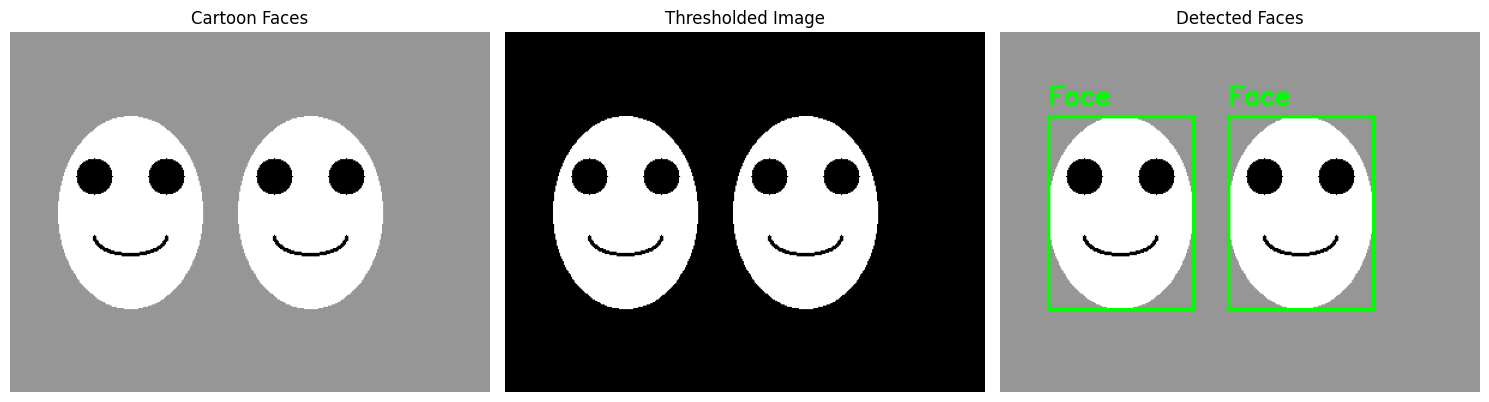


Face Recognition Applications:
1. Customer Analytics: Tracks demographics and behavior
2. Security: Identifies known customers or staff
3. Personalization: Customizes displays based on who's looking
4. Attendance: Automatically logs staff presence


In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def demonstrate_face_recognition():
    """
    Demonstrates basic face detection using simple shape recognition.
    Business application: Customer analytics in retail.
    """
    # Create a blank image
    image = np.zeros((300, 400, 3), dtype=np.uint8) + 150

    # Draw two simple cartoon faces with eyes and mouth
    for x_offset in [100, 250]:
        # Face oval
        cv2.ellipse(image, (x_offset, 150), (60, 80), 0, 0, 360, (255, 255, 255), -1)

        # Eyes
        cv2.circle(image, (x_offset-30, 120), 15, (0, 0, 0), -1)
        cv2.circle(image, (x_offset+30, 120), 15, (0, 0, 0), -1)

        # Mouth (smile)
        cv2.ellipse(image, (x_offset, 170), (30, 15), 0, 0, 180, (0, 0, 0), 2)

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Simple face detection by finding bright oval regions (faces)
    _, binary = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

    # Find contours of face regions
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw rectangles around detected faces
    detected_image = image.copy()
    for contour in contours:
        # Only consider large enough regions
        if cv2.contourArea(contour) > 1000:
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(detected_image, (x, y), (x+w, y+h), (0, 255, 0), 2)
            cv2.putText(detected_image, 'Face', (x, y-10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

    # Visualize the process
    plt.figure(figsize=(15, 5))

    plt.subplot(131)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Cartoon Faces')
    plt.axis('off')

    plt.subplot(132)
    plt.imshow(binary, cmap='gray')
    plt.title('Thresholded Image')
    plt.axis('off')

    plt.subplot(133)
    plt.imshow(cv2.cvtColor(detected_image, cv2.COLOR_BGR2RGB))
    plt.title('Detected Faces')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    print("\nFace Recognition Applications:")
    print("1. Customer Analytics: Tracks demographics and behavior")
    print("2. Security: Identifies known customers or staff")
    print("3. Personalization: Customizes displays based on who's looking")
    print("4. Attendance: Automatically logs staff presence")

# Run the demonstration
demonstrate_face_recognition()

### Reflective Questions:

1. What ethical considerations arise when using face recognition in retail?
2. How could this technology improve customer service?
3. What privacy protections should be implemented?

### Business Applications:

- **Retail**: Customer demographics and behavior analysis
- **Security**: Access control and surveillance
- **Marketing**: Targeted advertising and personalization
- **HR**: Attendance tracking and employee management

## 5. Business Challenge: Retail Analytics System

### Scenario

A retail store wants to implement a computer vision system to analyze customer
behavior and optimize store layout. Your task is to implement a simple version
of this system that can:

1. Detect when customers enter the store
2. Track basic movement patterns
3. Identify popular areas

### Implementation

Let's create a simple simulation of customer movement tracking.

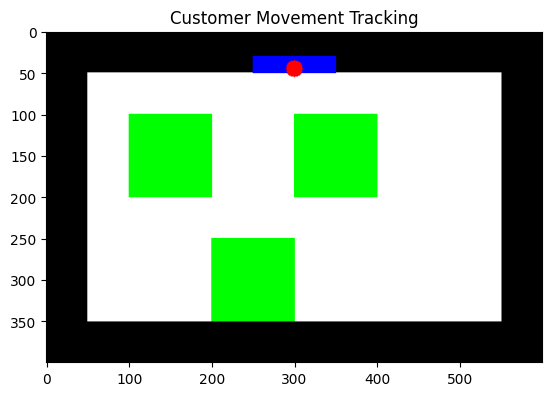

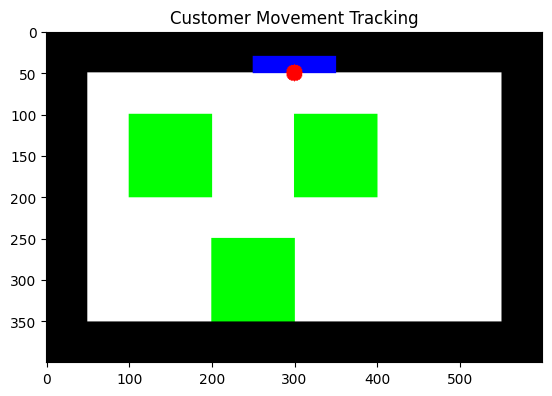

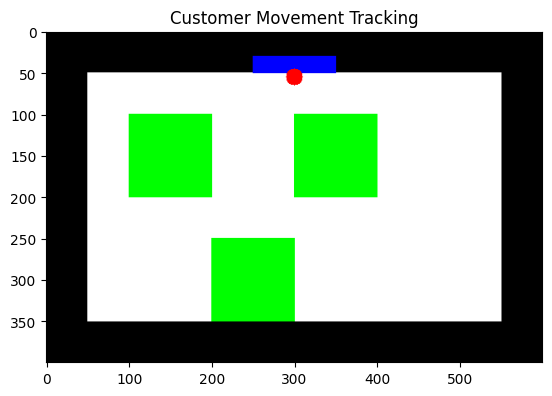

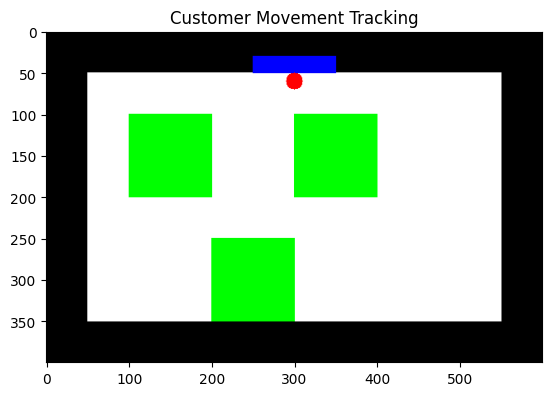

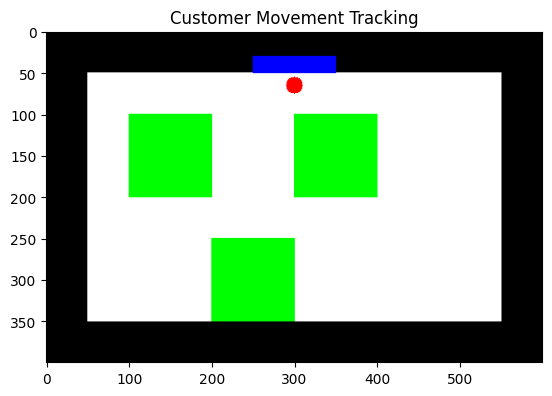

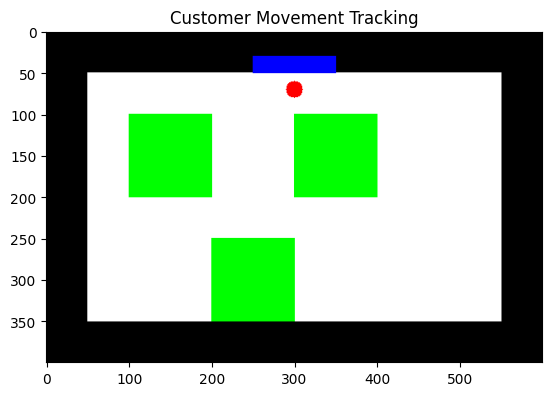

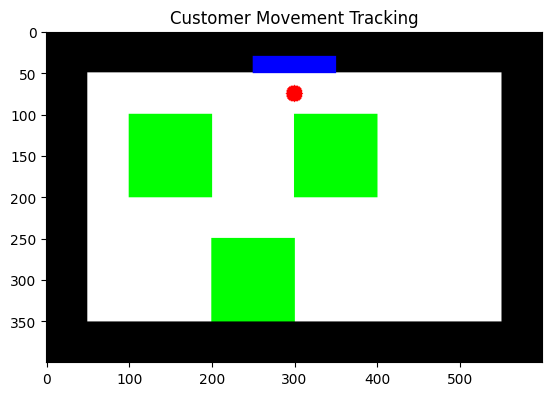

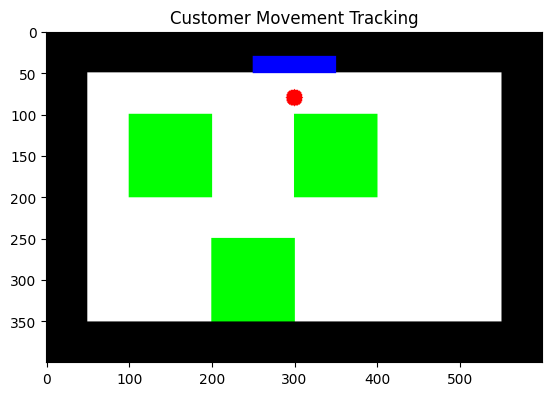

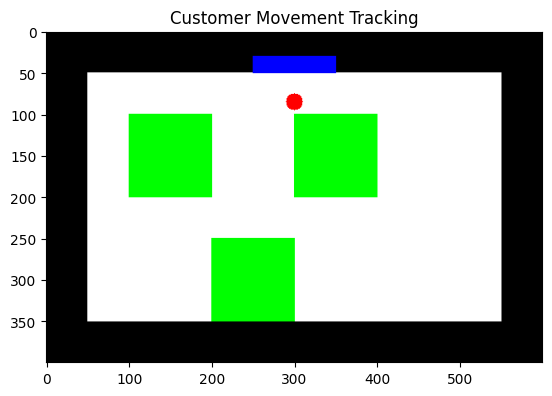

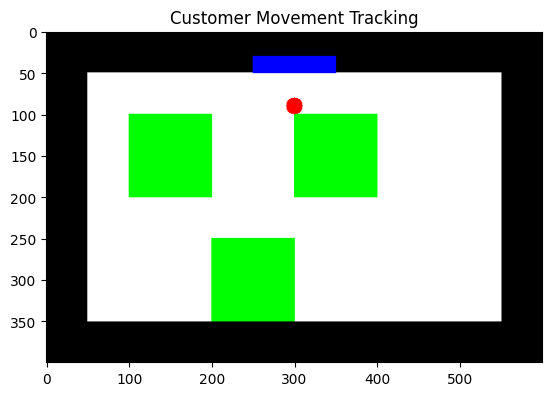

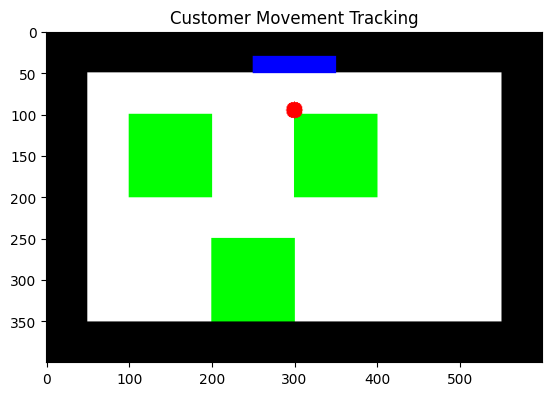

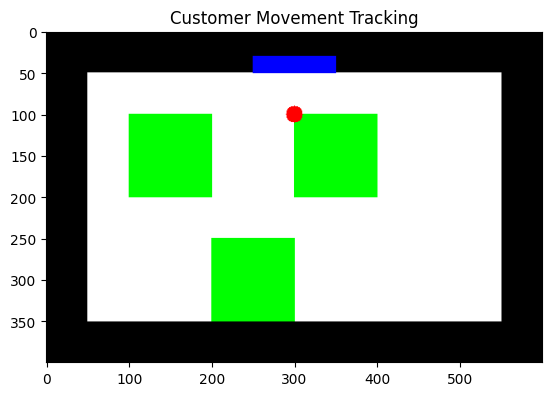

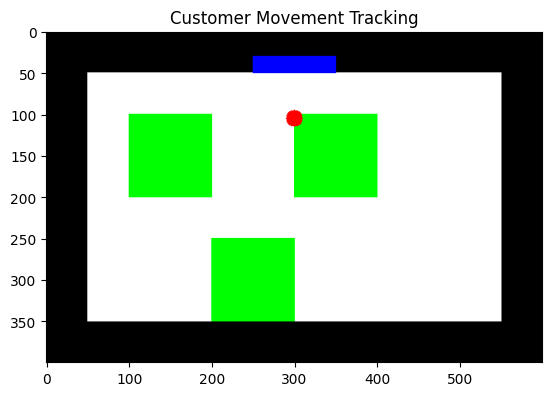

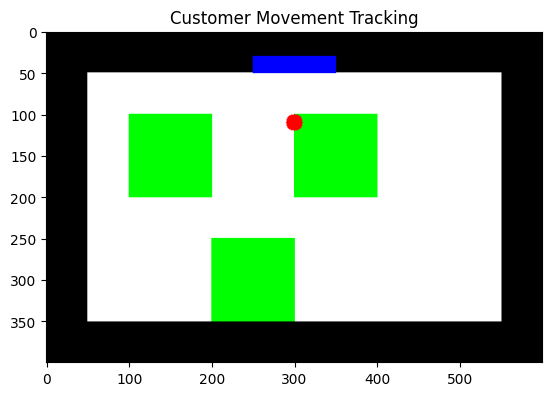

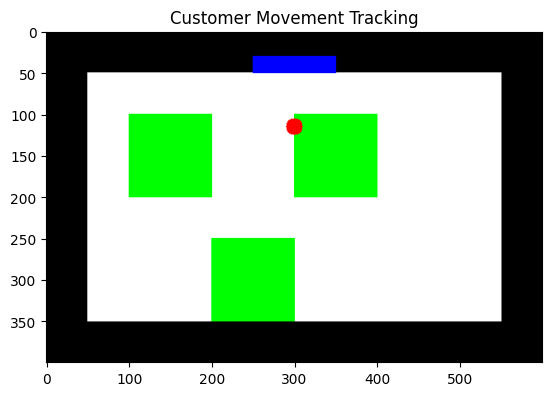

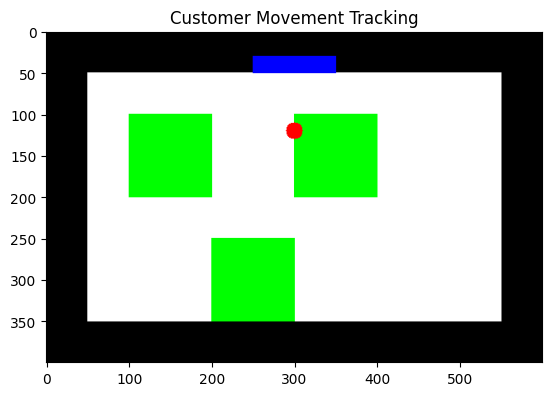

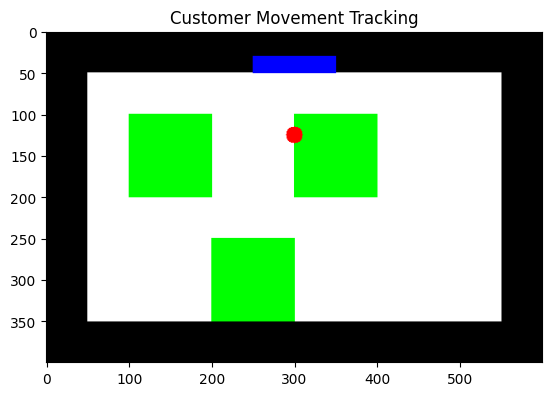

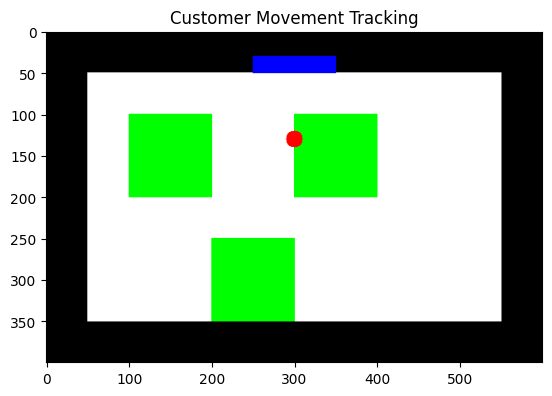

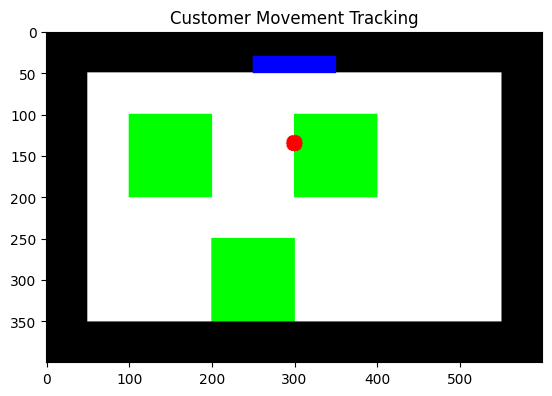

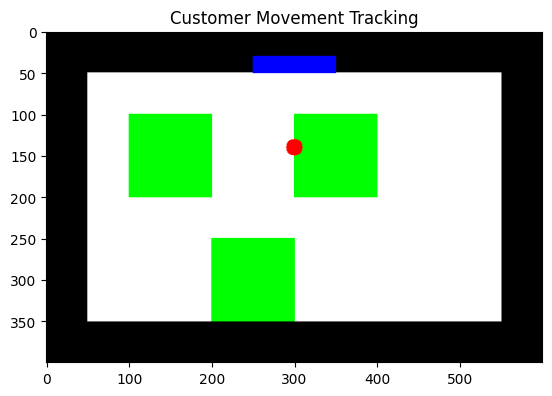

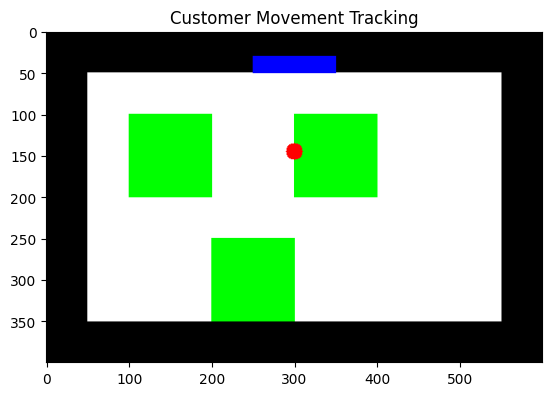

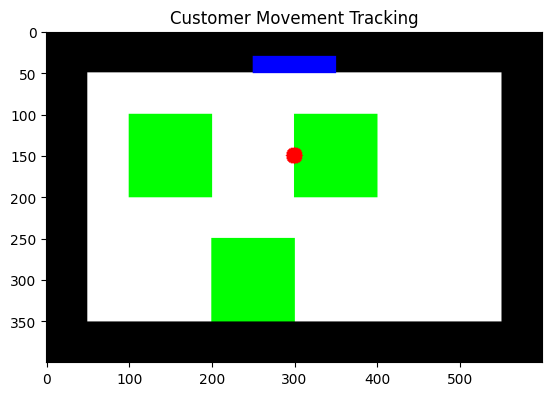

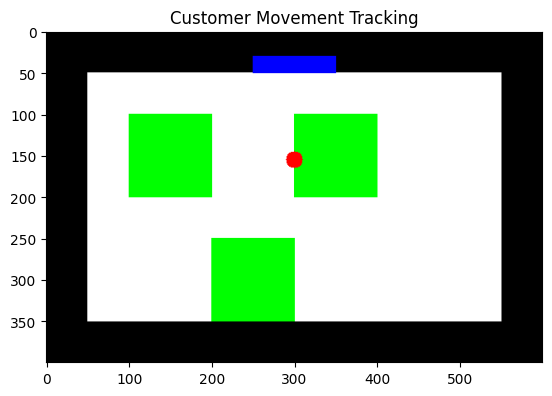

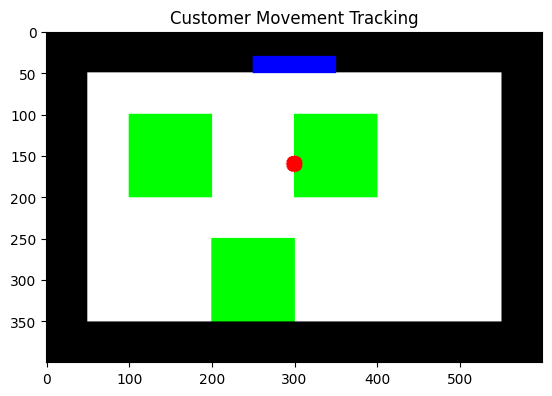

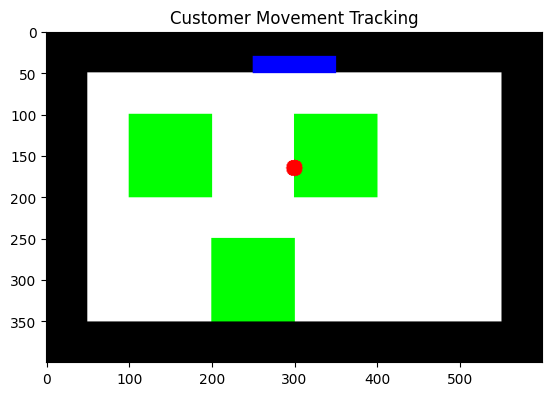

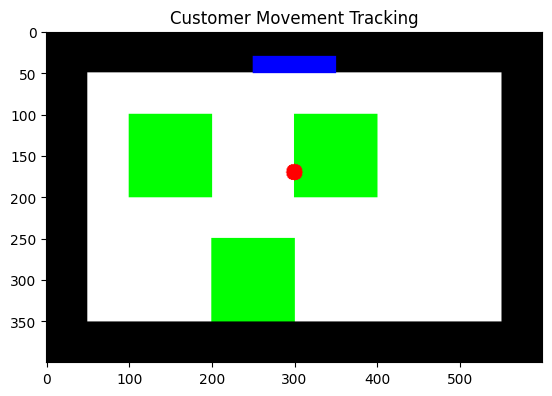

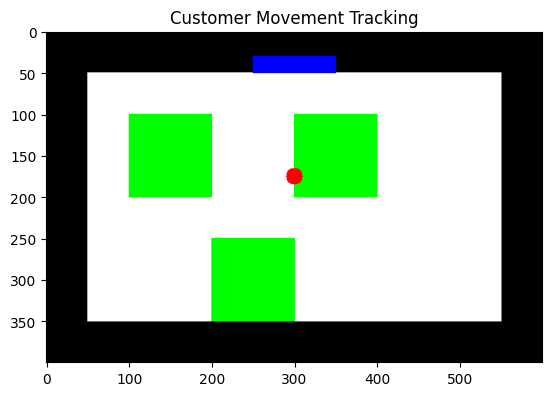

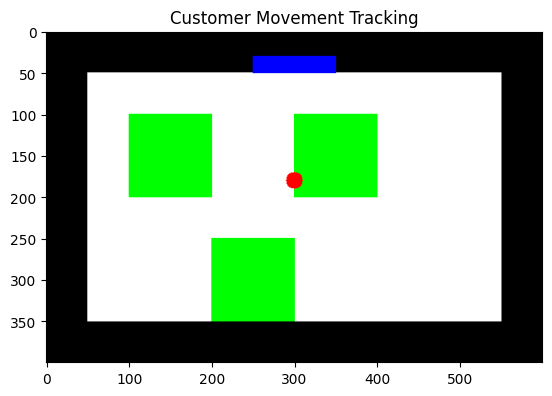

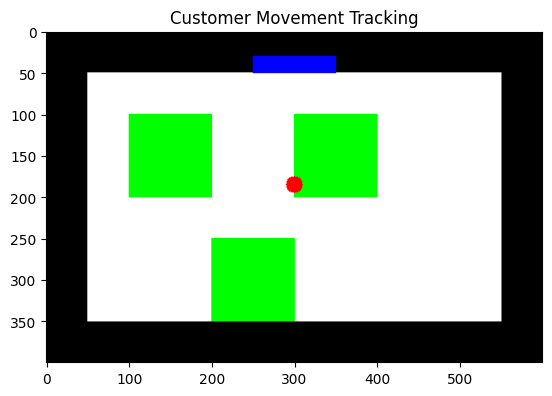

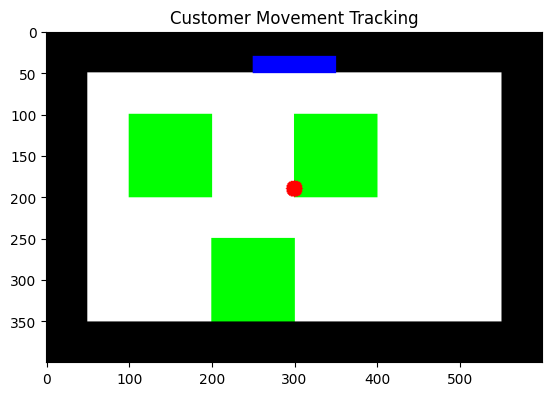

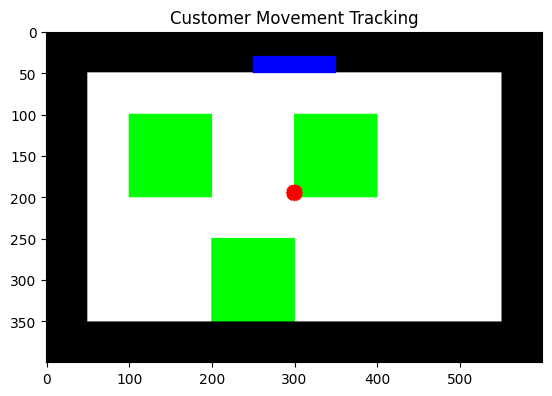

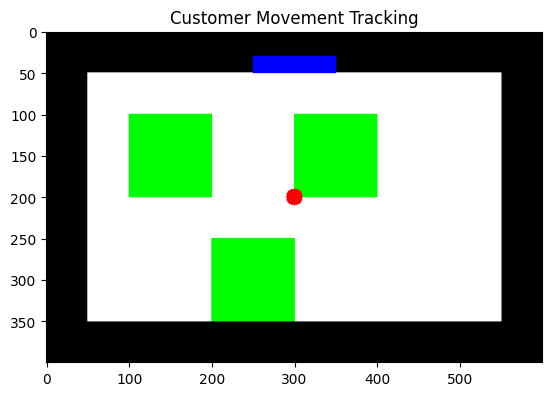

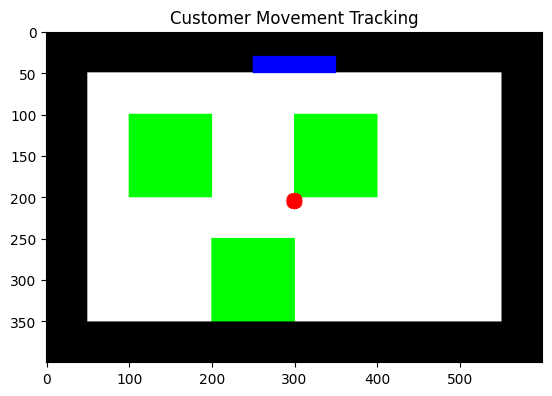

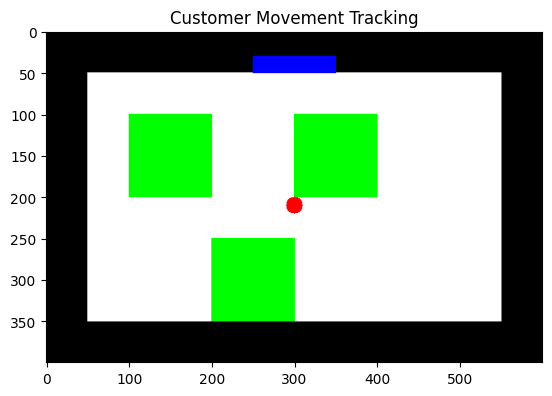

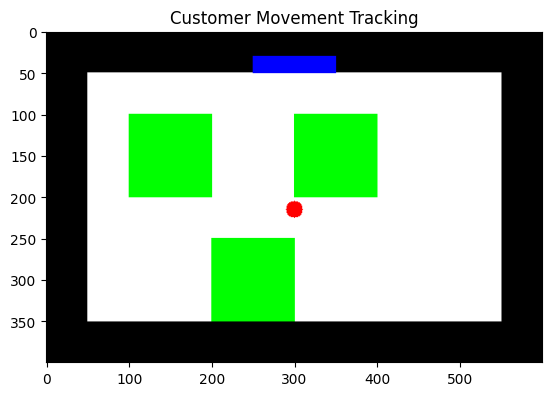

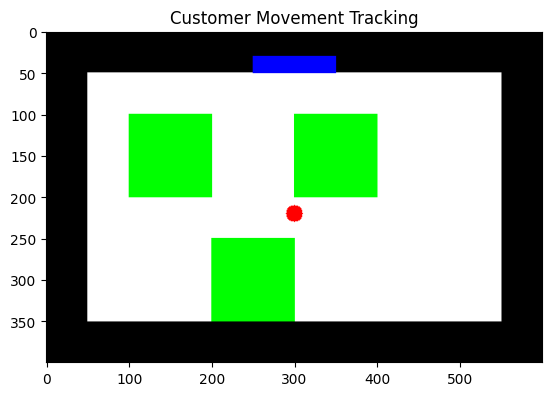

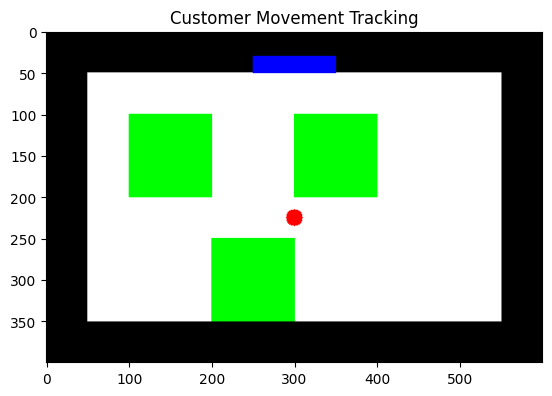

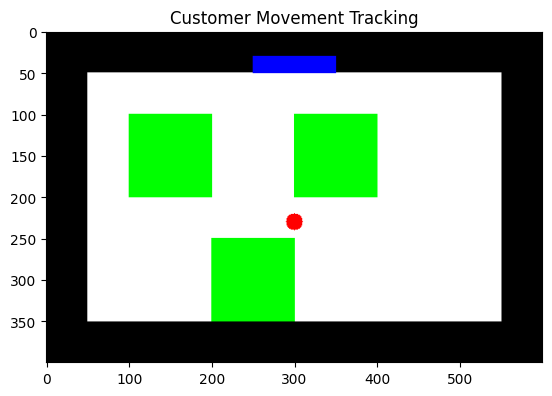

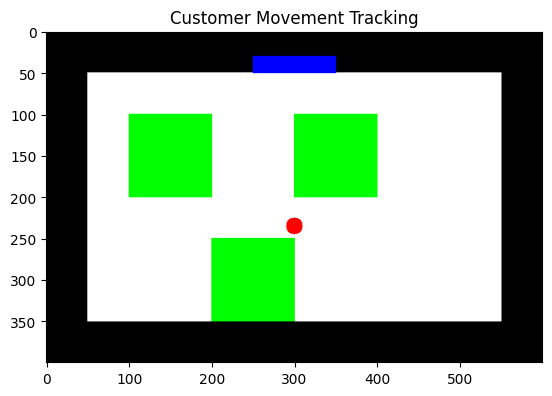

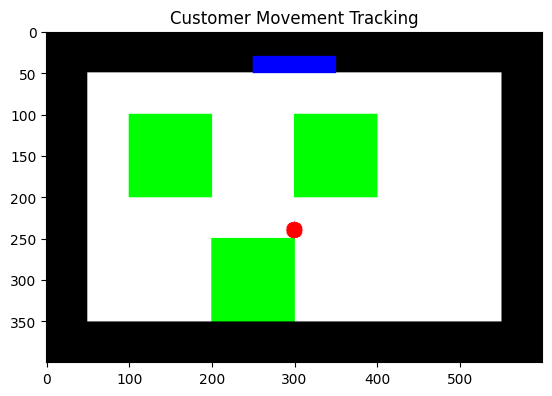

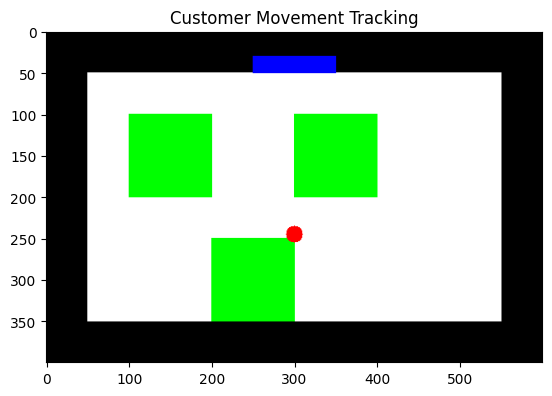

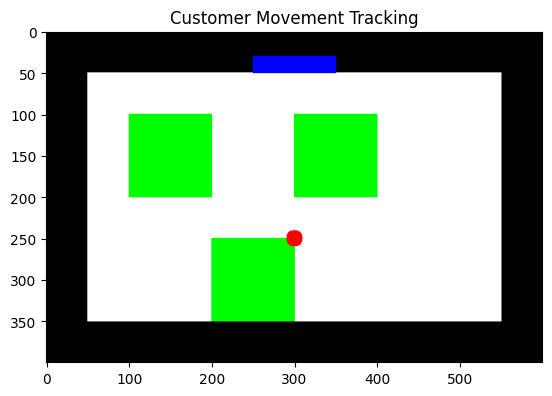

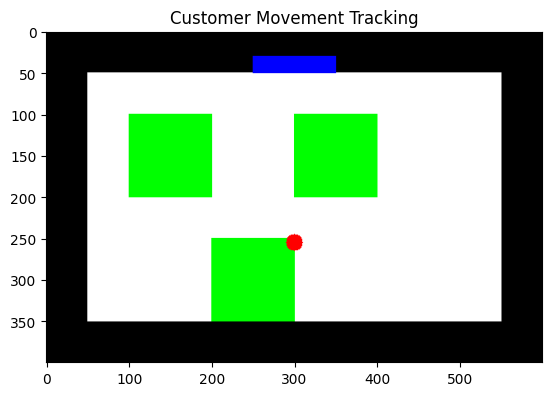

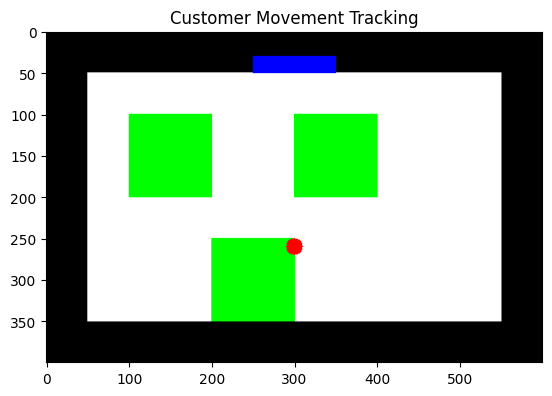

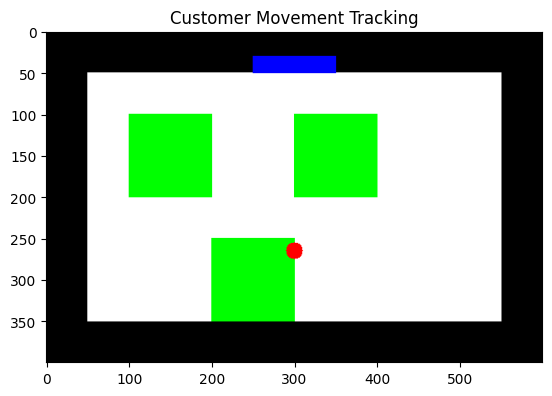

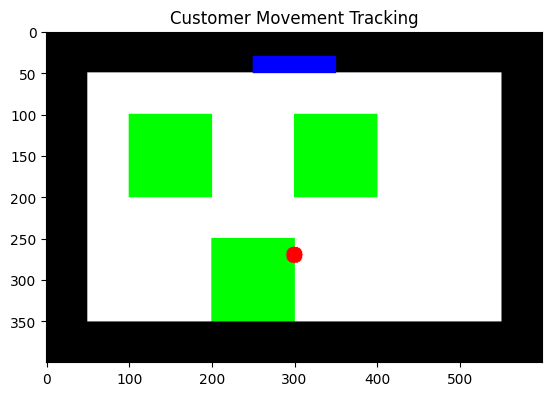

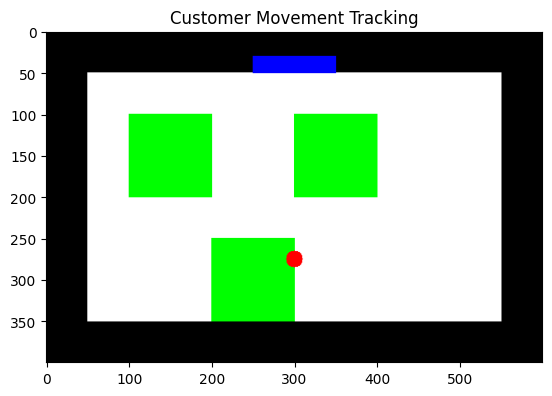

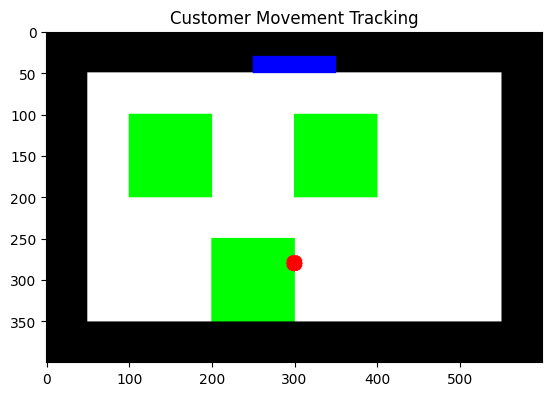

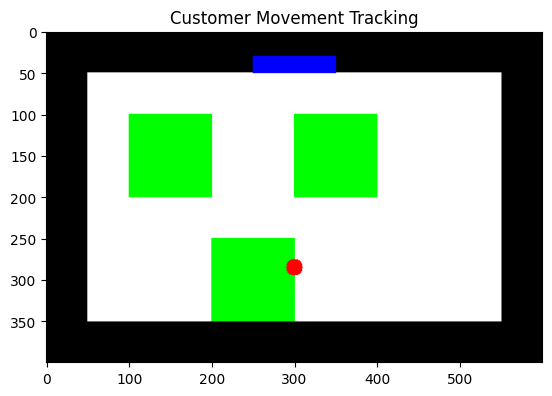

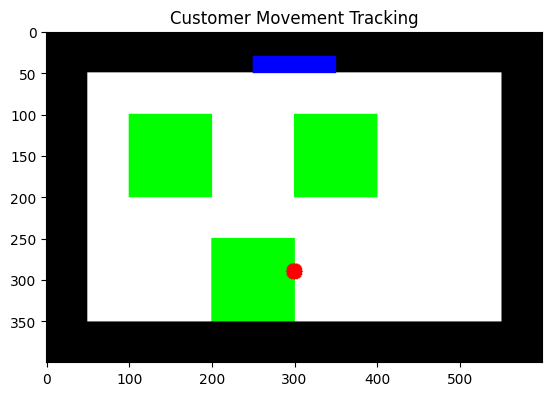

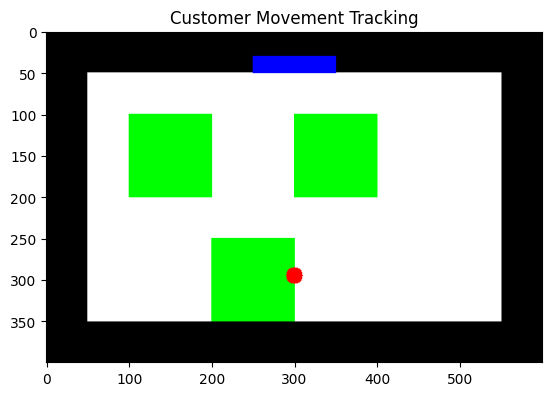

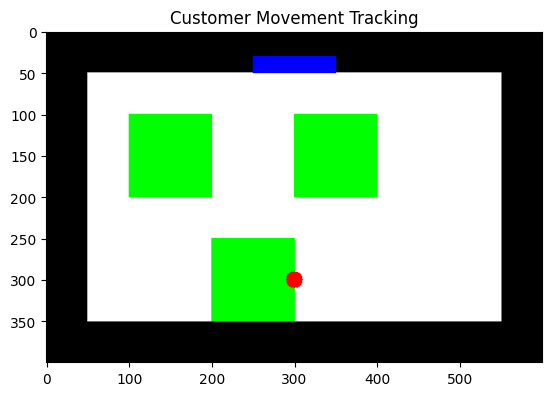

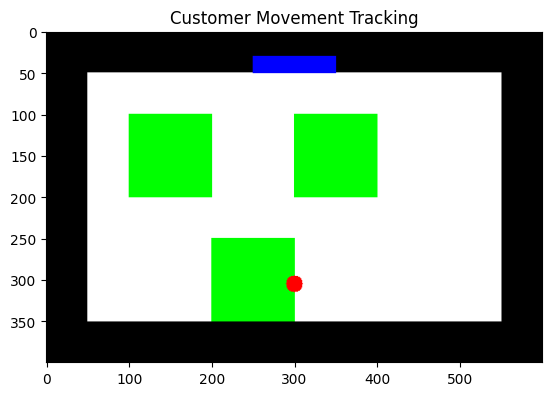

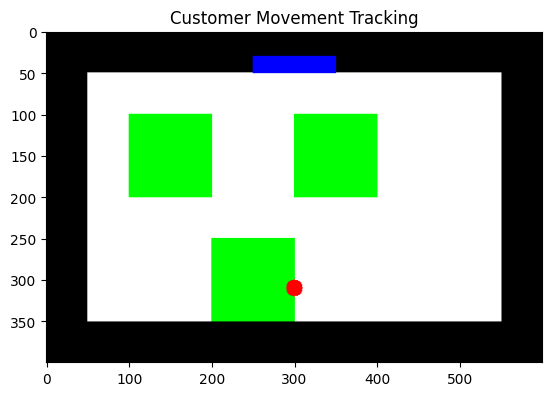

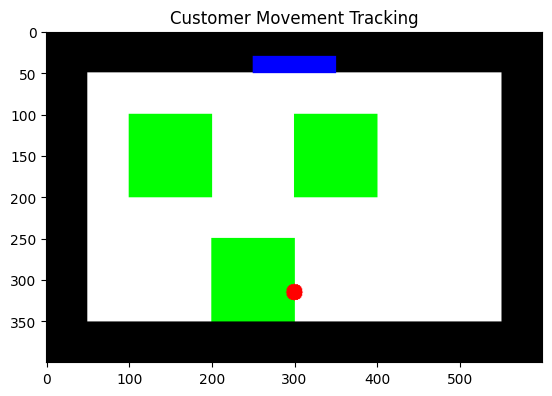

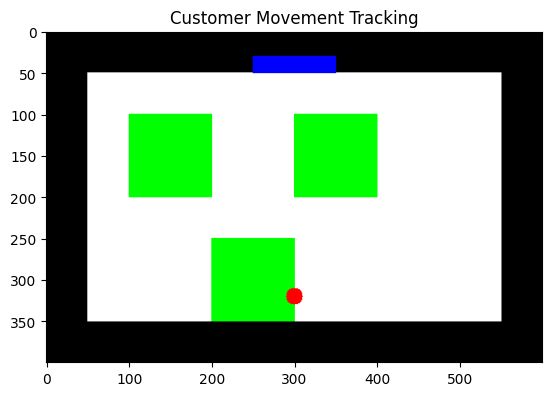

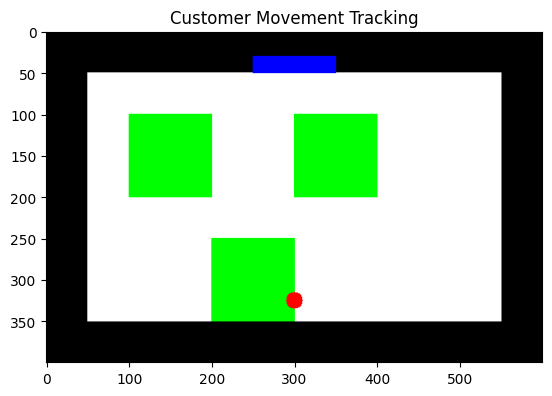

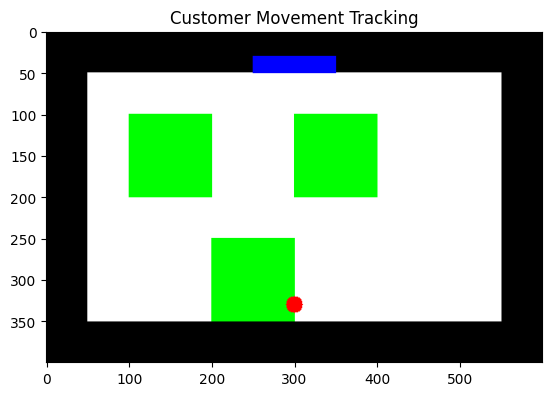

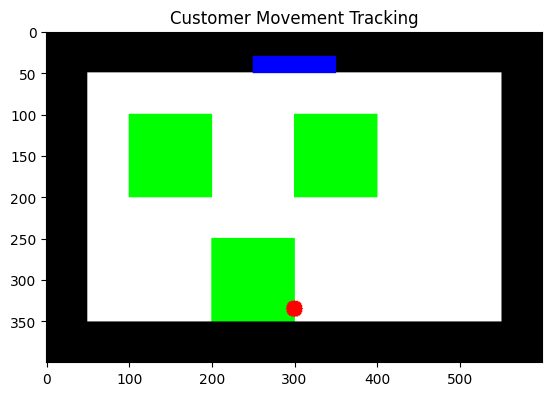

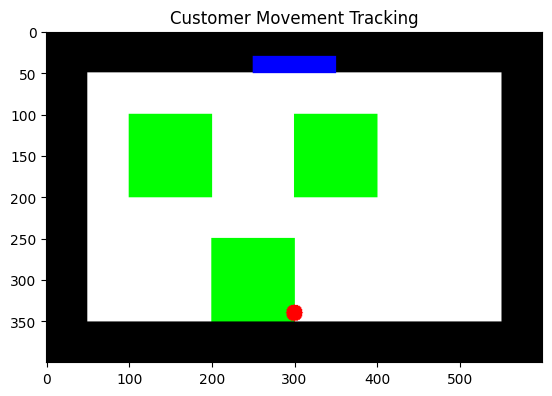


Business Challenge Implementation:
1. Customer Detection: Tracks entry points
2. Movement Analysis: Records walking patterns
3. Area Popularity: Identifies frequented sections


In [6]:
def business_challenge():
    """
    Final Business Challenge: Retail Analytics System

    Scenario: A retail store wants to implement a computer vision system
    to analyze customer behavior and optimize store layout.
    """
    # Create a simulated store layout
    store = np.zeros((400, 600, 3), dtype=np.uint8)

    # Draw store elements
    cv2.rectangle(store, (50, 50), (550, 350), (255, 255, 255), -1)  # Store floor
    cv2.rectangle(store, (100, 100), (200, 200), (0, 255, 0), -1)    # Product area 1
    cv2.rectangle(store, (300, 100), (400, 200), (0, 255, 0), -1)    # Product area 2
    cv2.rectangle(store, (200, 250), (300, 350), (0, 255, 0), -1)    # Product area 3

    # Draw entrance
    cv2.rectangle(store, (250, 30), (350, 50), (255, 0, 0), -1)

    # Simulate customer movement
    customer_pos = np.array([300, 40])  # Start at entrance
    movement = np.array([0, 5])  # Move down

    # Track customer position
    for _ in range(60):
        customer_pos += movement
        if customer_pos[1] > 350:  # Reset at bottom
            customer_pos = np.array([300, 40])

        # Draw customer
        store_copy = store.copy()
        cv2.circle(store_copy, tuple(customer_pos.astype(int)), 10, (0, 0, 255), -1)

        # Show frame
        plt.clf()
        plt.imshow(cv2.cvtColor(store_copy, cv2.COLOR_BGR2RGB))
        plt.title('Customer Movement Tracking')
        plt.pause(0.1)

    print("\nBusiness Challenge Implementation:")
    print("1. Customer Detection: Tracks entry points")
    print("2. Movement Analysis: Records walking patterns")
    print("3. Area Popularity: Identifies frequented sections")

business_challenge()

### Challenge Questions:

1. How could you enhance this system to track multiple customers?
2. What additional metrics would be valuable for store optimization?
3. How would you handle privacy concerns in a real implementation?

### Business Impact:

- Improved store layout optimization
- Better understanding of customer behavior
- Enhanced security and surveillance
- Data-driven decision making

## Summary and Key Takeaways

1. **Basic Image Processing**
   - Fundamental techniques for analyzing visual data
   - Applications in quality control and inspection

2. **Object Detection**
   - Identifying and locating objects in images
   - Uses in inventory management and security

3. **Image Segmentation**
   - Dividing images into meaningful regions
   - Applications in agriculture and healthcare

4. **Face Recognition**
   - Analyzing human faces in images
   - Uses in customer analytics and security

### Business Considerations

- Privacy and ethical concerns
- Implementation costs and ROI
- Integration with existing systems
- Employee training and adaptation

### Next Steps

1. Identify potential computer vision applications in your business
2. Evaluate technical requirements and resources
3. Consider privacy and ethical implications
4. Plan for implementation and integration